# The Idea:
Look at training examples, where the size of the input is the same as the size of the output, and the new color of the pixel at coordinate i,j can depend on the old color and i mod Q1 and j mod Q2, where Q1 and Q2 are some small integers. 


# Scores:

Training: 5/400

Evaluation: 1/400

Test: 1/100

This is the simplest idea I tried so far, and was quite surprised it worked. 

It seems you just need 99 other ideas....


In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/abstraction-and-reasoning-challenge
/kaggle/input/abstraction-and-reasoning-challenge/training
/kaggle/input/abstraction-and-reasoning-challenge/evaluation
/kaggle/input/abstraction-and-reasoning-challenge/test


# Getting the data

In [2]:
data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

# Helper Functions

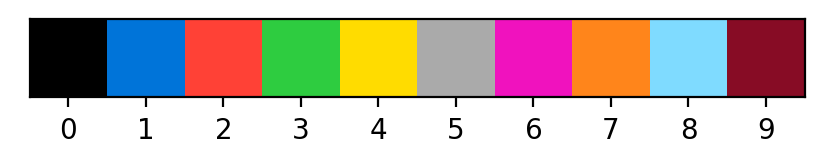

In [4]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [5]:
def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [6]:
def Defensive_Copy(A): 
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [7]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [8]:
def Recolor(task):
    Input = task[0]
    Output = task[1]
    Test_Picture = Input[-1]
    Input = Input[:-1]
    N = len(Input)
    
    for x, y in zip(Input, Output):
        if len(x) != len(y) or len(x[0]) != len(y[0]):
            return -1
        
    Best_Dict = -1
    Best_Q1 = -1
    Best_Q2 = -1
    Best_v = -1
    # v ranges from 0 to 3. This gives an extra flexibility of measuring distance from any of the 4 corners
    Pairs = []
    for t in range(15):
        for Q1 in range(1,8):
            for Q2 in range(1,8):
                if Q1+Q2 == t:
                    Pairs.append((Q1,Q2))
                    
    for Q1, Q2 in Pairs:
        for v in range(4):
    
  
            if Best_Dict != -1:
                continue
            possible = True
            Dict = {}
                      
            for x, y in zip(Input, Output):
                n = len(x)
                k = len(x[0])
                for i in range(n):
                    for j in range(k):
                        if v == 0 or v ==2:
                            p1 = i%Q1
                        else:
                            p1 = (n-1-i)%Q1
                        if v == 0 or v ==3:
                            p2 = j%Q2
                        else :
                            p2 = (k-1-j)%Q2
                        color1 = x[i][j]
                        color2 = y[i][j]
                        if color1 != color2:
                            rule = (p1, p2, color1)
                            if rule not in Dict:
                                Dict[rule] = color2
                            elif Dict[rule] != color2:
                                possible = False
            if possible:
                
                # Let's see if we actually solve the problem
                for x, y in zip(Input, Output):
                    n = len(x)
                    k = len(x[0])
                    for i in range(n):
                        for j in range(k):
                            if v == 0 or v ==2:
                                p1 = i%Q1
                            else:
                                p1 = (n-1-i)%Q1
                            if v == 0 or v ==3:
                                p2 = j%Q2
                            else :
                                p2 = (k-1-j)%Q2
                           
                            color1 = x[i][j]
                            rule = (p1,p2,color1)
                            
                            if rule in Dict:
                                color2 = 0 + Dict[rule]
                            else:
                                color2 = 0 + y[i][j]
                            if color2 != y[i][j]:
                                possible = False 
                if possible:
                    Best_Dict = Dict
                    Best_Q1 = Q1
                    Best_Q2 = Q2
                    Best_v = v
                
                
    if Best_Dict == -1:
        return -1 #meaning that we didn't find a rule that works for the traning cases
    
    #Otherwise there is a rule: so let's use it:
    n = len(Test_Picture)
    k = len(Test_Picture[0])
    
    answer = np.zeros((n,k), dtype = int)
   
    for i in range(n):
        for j in range(k):
            if Best_v == 0 or Best_v ==2:
                p1 = i%Best_Q1
            else:
                p1 = (n-1-i)%Best_Q1
            if Best_v == 0 or Best_v ==3:
                p2 = j%Best_Q2
            else :
                p2 = (k-1-j)%Best_Q2
           
            color1 = Test_Picture[i][j]
            rule = (p1, p2, color1)
            if (p1, p2, color1) in Best_Dict:
                answer[i][j] = 0 + Best_Dict[rule]
            else:
                answer[i][j] = 0 + color1
                                    
           
            
    return answer.tolist()

# Results on Training set

In [9]:
Function = Recolor

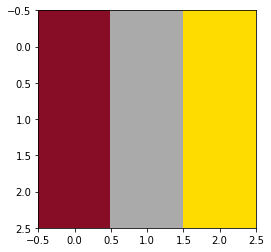

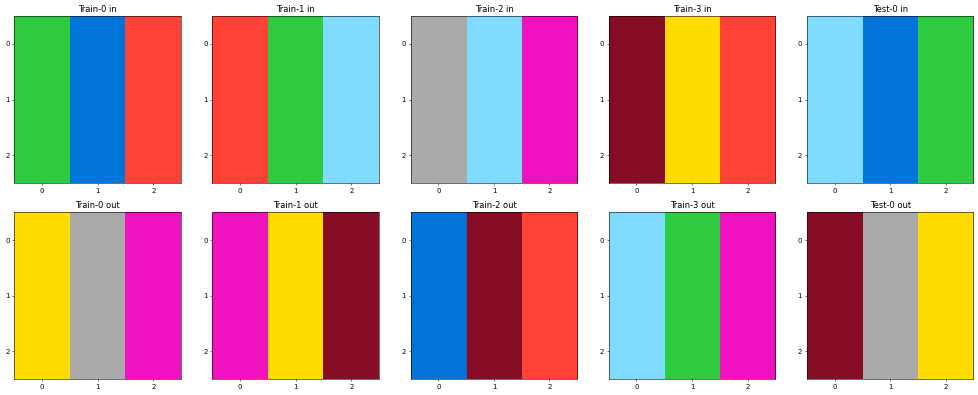

15


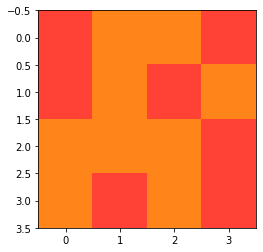

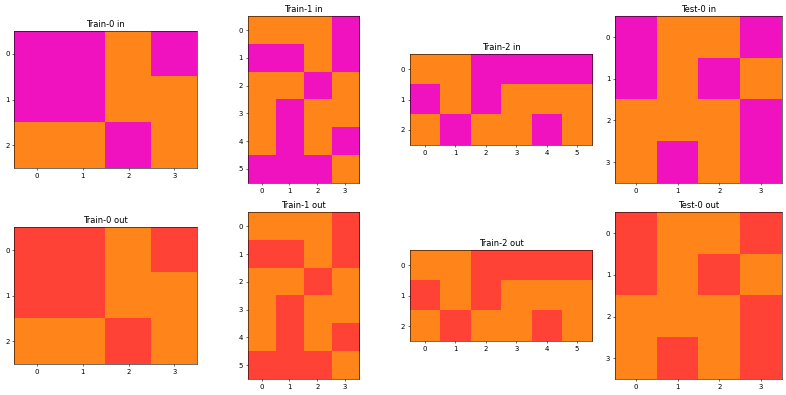

275


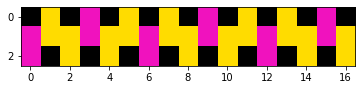

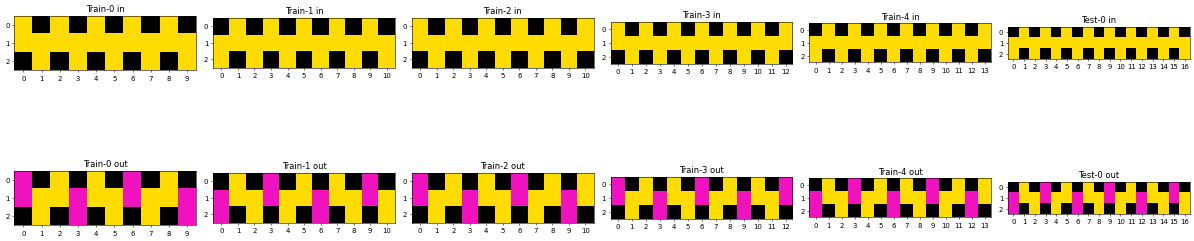

291


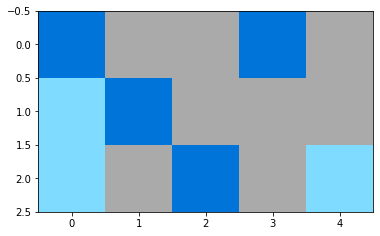

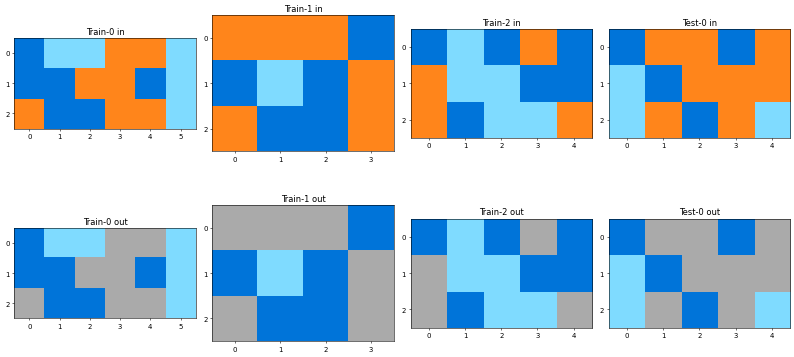

308


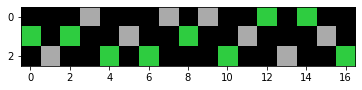

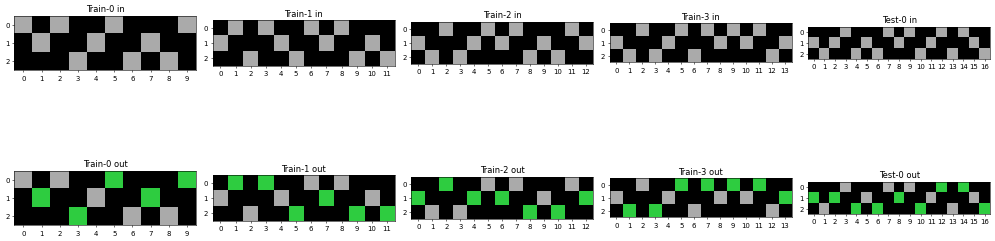

331


In [10]:
training_examples = []
for i in range(400):
    task = Trains[i]
    basic_task = Create(task,0)
    a = Function(basic_task)
  
    if  a != -1 and task['test'][0]['output'] == a:
        plot_picture(a)
        plot_task(task)
        print(i)
        training_examples.append(i)      

In [11]:
print(len(training_examples))
print(training_examples)

5
[15, 275, 291, 308, 331]


# Results on the evaluation set

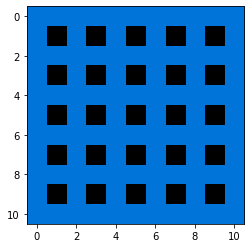

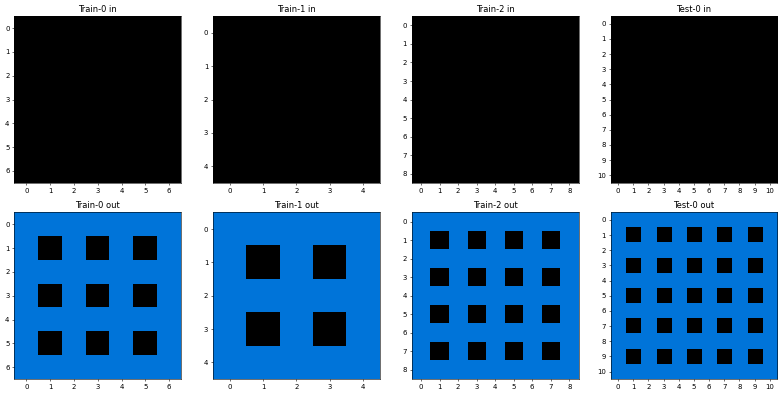

82


In [12]:
evaluation_examples = []


for i in range(400):
    task = Evals[i]
    basic_task = Create(task,0)
    a = Function(basic_task)
    
    if a != -1 and task['test'][0]['output'] == a:
       
        plot_picture(a)
        plot_task(task)
        print(i)
        evaluation_examples.append(i)        

In [13]:
print(len(evaluation_examples))
print(evaluation_examples)

1
[82]


In [14]:
submission = pd.read_csv(data_path/ 'sample_submission.csv')
submission.head()

,output_id,output
0,00576224_0,|32|78| |32|78| |00|00|
1,009d5c81_0,|00000000000000|00000888888888|00000800080808|...
2,00dbd492_0,|00000000000222220000|02222222220200020000|020...
3,03560426_0,|0000000000|0000000000|0000000000|0000000000|0...
4,05a7bcf2_0,|000000000020000000080000000000|00000000002220...


In [15]:
def flattener(pred):
    str_pred = str([row for row in pred])
    str_pred = str_pred.replace(', ', '')
    str_pred = str_pred.replace('[[', '|')
    str_pred = str_pred.replace('][', '|')
    str_pred = str_pred.replace(']]', '|')
    return str_pred

In [16]:
example_grid = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
display(example_grid)
print(flattener(example_grid))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

|123|456|789|


In [17]:
Solved = []
Problems = submission['output_id'].values
Proposed_Answers = []
for i in  range(len(Problems)):
    output_id = Problems[i]
    task_id = output_id.split('_')[0]
    pair_id = int(output_id.split('_')[1])
    f = str(test_path / str(task_id + '.json'))
   
    with open(f, 'r') as read_file:
        task = json.load(read_file)
    
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][j]['input']) for j in range(n)]
    Output = [Defensive_Copy(task['train'][j]['output']) for j in range(n)]
    Input.append(Defensive_Copy(task['test'][pair_id]['input']))
    
    solution = Recolor([Input, Output])
   
    
    pred = ''
        
    if solution != -1:
        Solved.append(i)
        pred1 = flattener(solution)
        pred = pred+pred1+' '
        
    if pred == '':
        pred = flattener(example_grid)
        
    Proposed_Answers.append(pred)
    
submission['output'] = Proposed_Answers
submission.to_csv('submission.csv', index = False)

In [18]:
print(Solved)

[47, 85]


In [19]:
submission2 = pd.read_csv('submission.csv')
submission2.tail(25)

,output_id,output
79,3194b014_0,|123|456|789|
80,319f2597_0,|123|456|789|
81,31adaf00_0,|123|456|789|
82,31d5ba1a_0,|123|456|789|
83,31d5ba1a_1,|123|456|789|
84,32e9702f_0,|123|456|789|
85,332efdb3_0,|11111111111|10101010101|11111111111|101010101...
86,3391f8c0_0,|123|456|789|
87,33b52de3_0,|123|456|789|
88,3490cc26_0,|123|456|789|


In [20]:
submission2.head()

,output_id,output
0,00576224_0,|123|456|789|
1,009d5c81_0,|123|456|789|
2,00dbd492_0,|123|456|789|
3,03560426_0,|123|456|789|
4,05a7bcf2_0,|123|456|789|
